**ANALITICA PREDICTIVA**

TAREA: SEMANA 4

Alexander García


**1.- Importe la base de datos a una base en Jupyter Notebook con pandas.(Walmart) .**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Walmart.csv")
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


**2.- Obtenga los descriptivos resumen de la base de datos e identifique las variables numérica y categóricas.
Indique , hay algo que le llame la atención?**

In [3]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [4]:
df.rename({'Store':'nro_tienda', 'Date': 'fecha', 'Weekly_Sales':'ventas', 'Holiday_Flag': 'feriado', 'Temperature':'temperatura','Fuel_Price':'precio_combustible','CPI':'ind_precio_consumidor','Unemployment':'tasa_desempleo'},  axis=1, inplace=True)
df

,nro_tienda,fecha,ventas,feriado,temperatura,precio_combustible,ind_precio_consumidor,tasa_desempleo
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   nro_tienda             6435 non-null   int64  
 1   fecha                  6435 non-null   object 
 2   ventas                 6435 non-null   float64
 3   feriado                6435 non-null   int64  
 4   temperatura            6435 non-null   float64
 5   precio_combustible     6435 non-null   float64
 6   ind_precio_consumidor  6435 non-null   float64
 7   tasa_desempleo         6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


Los tipos de variables identificadas son:

**VARIABLES NUMERICAS:**  nro_tienda, ventas, feriado, temperatura, precio_combustible, indicador_precio_consumidor, tasa_desempleo.

**VARIABLES CATEGORICAS:** fecha

Con la función describe() se puede observar completitud de los datos (6435 registros).

La variable feriado esta dumificada.

Se puede visualizar información en grupo respecto a las tiendas (total 45 tiendas)

**3._Evalúe si la base contiene datos perdidos.**

In [6]:
df.isna().sum()

nro_tienda               0
fecha                    0
ventas                   0
feriado                  0
temperatura              0
precio_combustible       0
ind_precio_consumidor    0
tasa_desempleo           0
dtype: int64

En la data no hay valores nulos o perdidos.

**4._Evalúe si alguna de las variables contiene datos atípicos (outliers)** 

-De ser el caso, detalle cuáles y qué método estadístico aplicarán para corregir. 


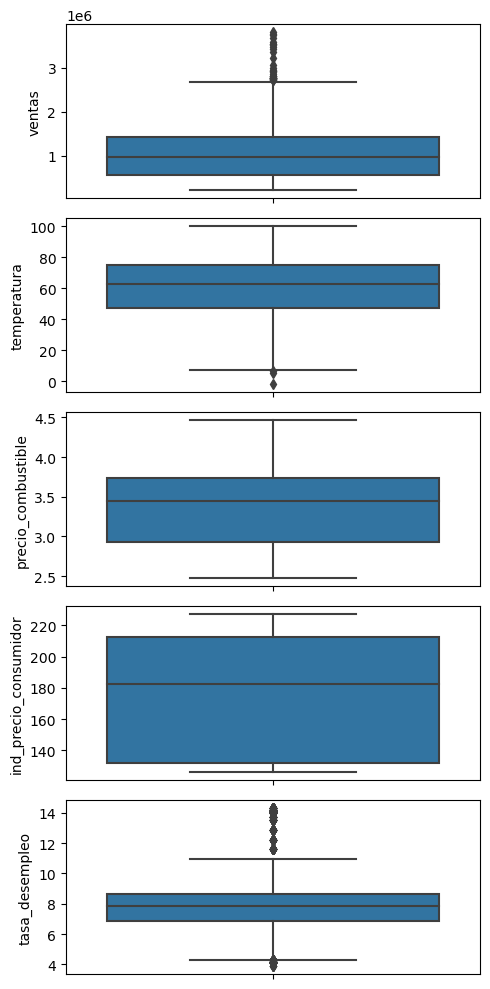

In [7]:
# Identificamos a través de la función Box plots

fig, axs = plt.subplots(5, figsize = (5,10))

plt1 = sns.boxplot(y=df['ventas'], ax = axs[0])
plt2 = sns.boxplot(y=df['temperatura'], ax = axs[1])
plt3 = sns.boxplot(y=df['precio_combustible'], ax = axs[2])
plt4 = sns.boxplot(y=df['ind_precio_consumidor'], ax = axs[3])
plt5 = sns.boxplot(y=df['tasa_desempleo'], ax = axs[4])

plt.tight_layout()

En la gráfica podemos observar datos atípicos en las variables de: ventas y tasa de desempleo.

Para corregir estos valores atípicos, removemos las observaciones que se encuentran fuera del rango 1.5xIQR.

In [8]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df['ventas'].quantile(0.25)
Q3 = df['ventas'].quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

866808.5549999999


In [9]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
#df = df[~((df['ventas'] < (Q1 - 1.5 * IQR)) |(df['ventas'] > (Q3 + 1.5 * IQR)))]
#df.shape

In [10]:
# Calculamos el Quartil 1 y Quartil 3 que son aquellos que nos permiten estimar los límites de los datos atípicos
Q1 = df['tasa_desempleo'].quantile(0.25)
Q3 = df['tasa_desempleo'].quantile(0.75)
IQR = Q3 - Q1  #rango intercuartil
print(IQR)

1.7309999999999999


In [11]:
# Ahora removemos aquellas observaciones que se encuentran por fuera del rango: 1.5 x IOR
df = df[~((df['tasa_desempleo'] < (Q1 - 1.5 * IQR)) |(df['tasa_desempleo'] > (Q3 + 1.5 * IQR)))]
df.shape

(5954, 8)

In [12]:
#Revisión de los valores actualizadas de las variables
df.describe()

,nro_tienda,ventas,feriado,temperatura,precio_combustible,ind_precio_consumidor,tasa_desempleo
count,5954.000000,5.954000e+03,5954.000000,5954.000000,5954.000000,5954.000000,5954.000000
mean,22.741014,1.050894e+06,0.070205,60.289516,3.339394,174.922598,7.720574
std,13.087596,5.721913e+05,0.255513,18.454730,0.457374,39.027865,1.242527
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,4.308000
25%,11.000000,5.541472e+05,0.000000,46.757500,2.891000,132.761933,6.891000
50%,22.000000,9.513791e+05,0.000000,62.390000,3.417000,189.808591,7.852000
75%,34.000000,1.436133e+06,0.000000,74.660000,3.720000,213.764640,8.494000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,10.926000


**5.Grafique las distribuciones de las variables y a priori comente sobre ellas.**

<Axes: xlabel='ventas', ylabel='Density'>

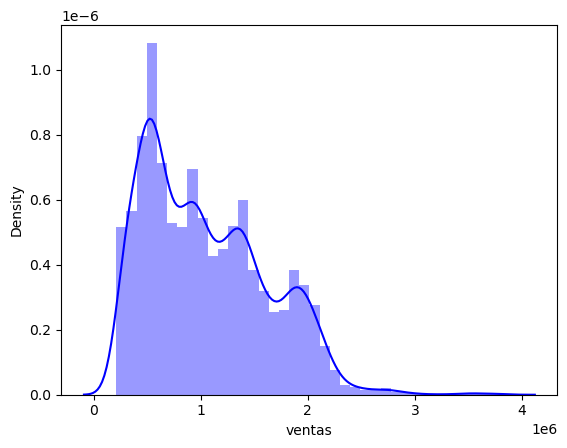

In [13]:
sns.distplot(df['ventas'],color="blue")


Del gráfico podríamos indicar que la distribución multimodal, están sesgados a la derecha, el sesgo estadístico es positivo. 

<Axes: xlabel='temperatura', ylabel='Density'>

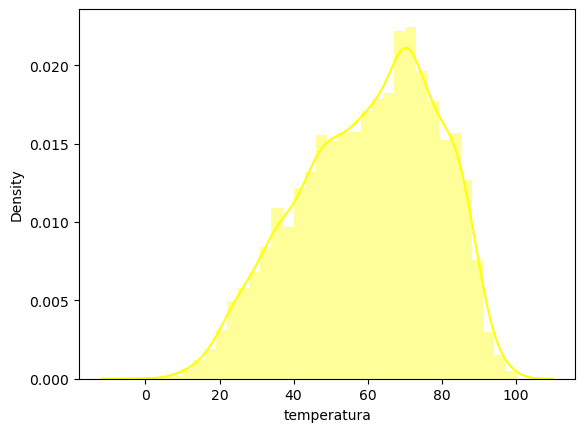

In [14]:
sns.distplot(df['temperatura'],color="yellow")


Del gráfico con la variable temperatura podríamos indicar que la distribución esta sesgada hacia la izquierda lo que nos indica que hay pocos valores bajos y muchos valores altos. 

<Axes: xlabel='precio_combustible', ylabel='Density'>

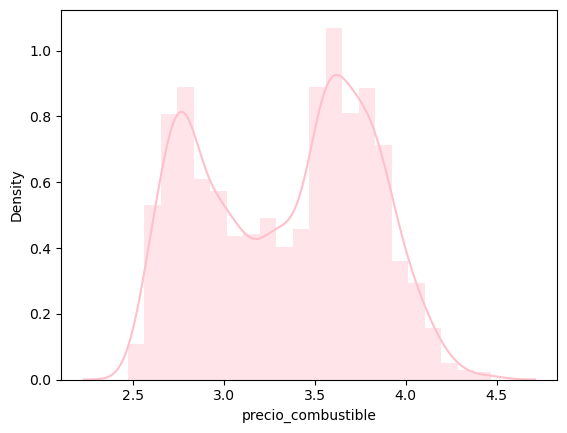

In [15]:
sns.distplot(df['precio_combustible'],color="pink")


Del gráfico con la variable temperatura podríamos indicar que la distribución bimodal

<Axes: xlabel='ind_precio_consumidor', ylabel='Density'>

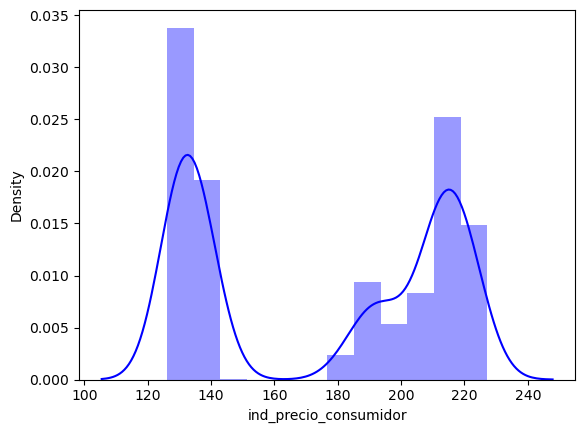

In [16]:
sns.distplot(df['ind_precio_consumidor'],color="blue")


Del gráfico con la variable temperatura podríamos indicar que la distribución bimodal

<Axes: xlabel='tasa_desempleo', ylabel='Density'>

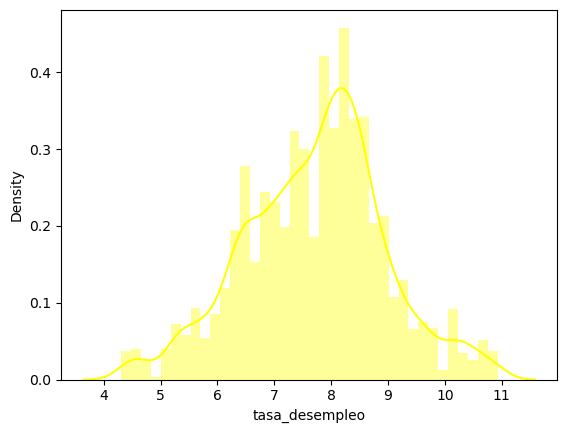

In [17]:
sns.distplot(df['tasa_desempleo'],color="yellow")

Del gráfico con la variable temperatura podríamos indicar que la distribución esta sesgada hacia la izquierda lo que nos indica que hay pocos valores bajos y muchos valores altos. 

**6.-Obtenga las correlaciones entre los datos de corte numérico.**

In [18]:
#Obtenémos el gráfico de correlación de las variables del modelo

#var_cuantitativas = df.select_dtypes('number').columns
#dfc= df[var_cuantitativas]
#dfc.corr().style.background_gradient(cmap='coolwarm')

dfc=df[["ventas","temperatura","precio_combustible","ind_precio_consumidor","tasa_desempleo","feriado"]]
dfc.corr().style.background_gradient(cmap='coolwarm')

,ventas,temperatura,precio_combustible,ind_precio_consumidor,tasa_desempleo,feriado
ventas,1.000000,-0.061389,0.011257,-0.087443,-0.074999,0.036725
temperatura,-0.061389,1.000000,0.147560,0.218762,0.026236,-0.156881
precio_combustible,0.011257,0.147560,1.000000,-0.142689,-0.104268,-0.076853
ind_precio_consumidor,-0.087443,0.218762,-0.142689,1.000000,-0.216206,-0.003215
tasa_desempleo,-0.074999,0.026236,-0.104268,-0.216206,1.000000,0.009751
feriado,0.036725,-0.156881,-0.076853,-0.003215,0.009751,1.000000


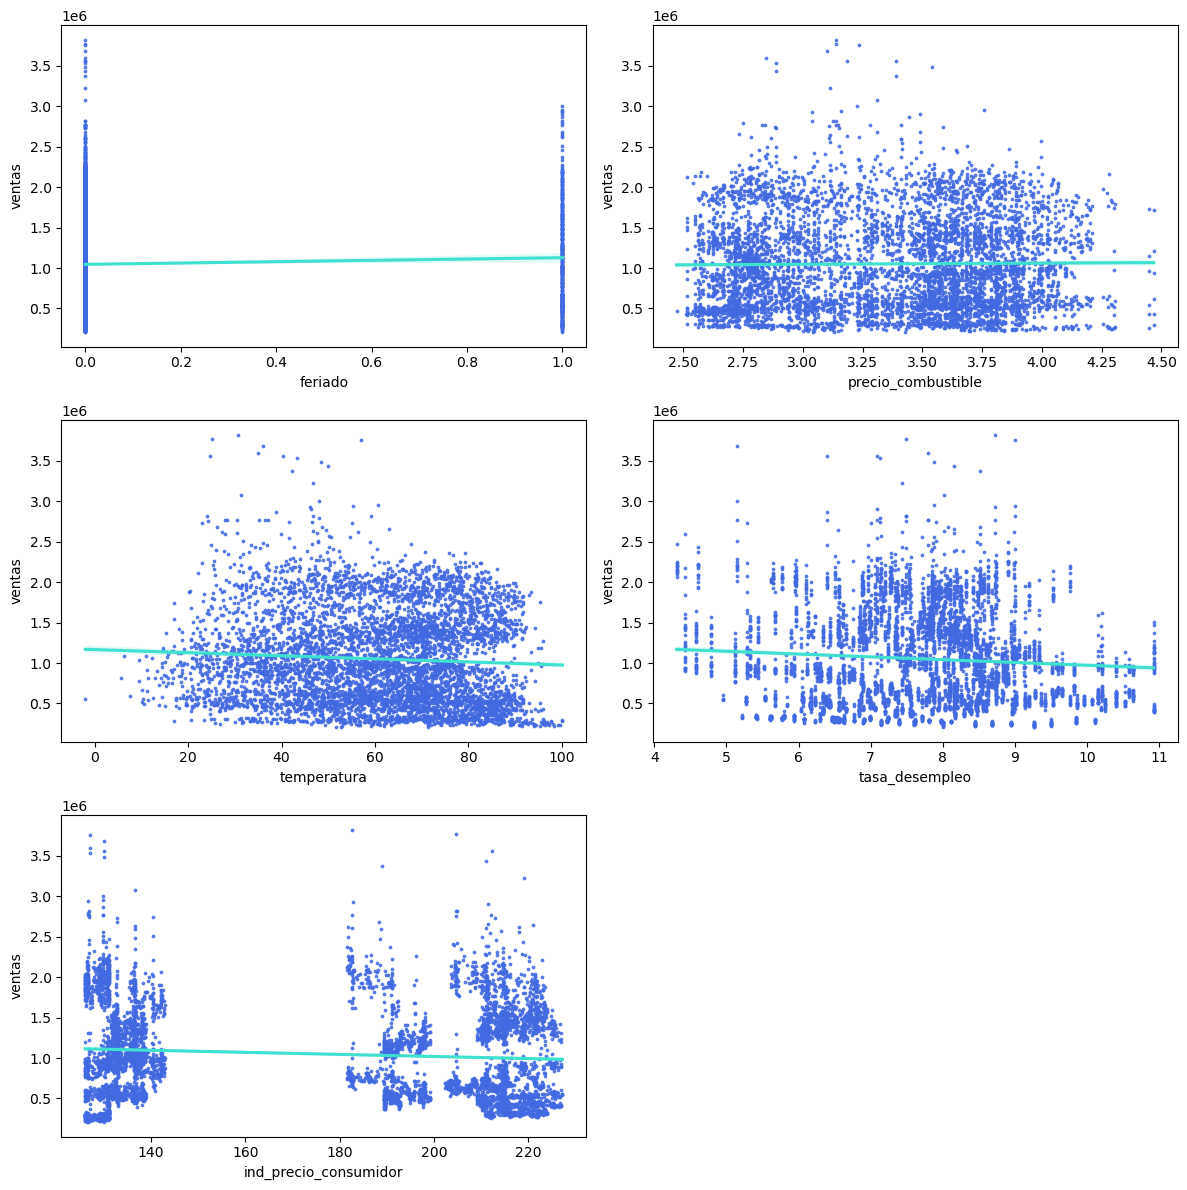

In [19]:
# Número de las variables
n = 6
fig = plt.figure(figsize=(12,12))
# Correlaciones en pares
corr = dfc.corr()
#
cols = corr.nlargest(7, "ventas")["ventas"].index
# Calculate correlation
for i in np.arange(1,6):
    regline = dfc[cols[i]]
    ax = fig.add_subplot(3,2,i)
    sns.regplot(x=regline, y=dfc['ventas'], scatter_kws={"color": "royalblue", "s": 3},
                line_kws={"color": "turquoise"})
plt.tight_layout()
plt.show()


**7.-Comente que variable escogerán como variable dependiente y que variables introducirán a su modelo.**

Como variable dependiente (y) se escoge **ventas**, las ventas son el objeto de estudio en el modelo. 
Como variables explicativas o independientes (x)  **precio_combustible, temperatura, tasa_desempleo, ind_precio_consumidor, feriado**, se observa por los gráficos donde se analiza la correlación y dispersión, las variables que tienen mayor incidencia en el modelo (precio y temperatura).



**8.-Indique que tipo de modelación realizarán y porqué.**

Ya que tenemos en la data una variable fecha y además tienen variable de grupo de número de tienda y hay una variable ventas que depende de varias factores independientes como son  precio_combustible, temperatura, tasa_desempleo, ind_precio_consumidor, feriado, a priori vamos a probar el modelo de panel.

Requerimos especificar los índice para nuestra base de datos. En este caso, setiaremos al año y al codificado de estado como referencia.

In [20]:
dfOriginal= df

In [21]:
df=df.set_index(['fecha', 'nro_tienda'])

In [22]:
fecha = df.index.get_level_values('fecha').to_list()
df['fecha'] = pd.Categorical(fecha)

In [23]:
!pip install linearmodels
from linearmodels import PooledOLS
import statsmodels.api as sm

In [24]:
dfc1=df[["temperatura","precio_combustible","ind_precio_consumidor","tasa_desempleo","feriado"]]
X = sm.tools.tools.add_constant(dfc1)
y = df.ventas

In [25]:
y

fecha       nro_tienda
05-02-2010  1             1643690.90
12-02-2010  1             1641957.44
19-02-2010  1             1611968.17
26-02-2010  1             1409727.59
05-03-2010  1             1554806.68
                             ...    
28-09-2012  45             713173.95
05-10-2012  45             733455.07
12-10-2012  45             734464.36
19-10-2012  45             718125.53
26-10-2012  45             760281.43
Name: ventas, Length: 5954, dtype: float64

In [26]:
X

,,const,temperatura,precio_combustible,ind_precio_consumidor,tasa_desempleo,feriado
fecha,nro_tienda,,,,,,
05-02-2010,1,1.0,42.31,2.572,211.096358,8.106,0
12-02-2010,1,1.0,38.51,2.548,211.242170,8.106,1
19-02-2010,1,1.0,39.93,2.514,211.289143,8.106,0
26-02-2010,1,1.0,46.63,2.561,211.319643,8.106,0
05-03-2010,1,1.0,46.50,2.625,211.350143,8.106,0
...,...,...,...,...,...,...,...
28-09-2012,45,1.0,64.88,3.997,192.013558,8.684,0
05-10-2012,45,1.0,64.89,3.985,192.170412,8.667,0
12-10-2012,45,1.0,54.47,4.000,192.327265,8.667,0


In [27]:
modelo1 = PooledOLS(y, X)

In [28]:
resultados_pooled_OLS = modelo1.fit(cov_type='clustered', cluster_entity=True)

In [29]:
# checking homoskedasticity graphically
predicciones_pooled_OLS = resultados_pooled_OLS.predict().fitted_values

In [30]:
residuos_pooled_OLS = resultados_pooled_OLS.resids
resultados_pooled_OLS

Dep. Variable:,ventas,R-squared:,0.0193
Estimator:,PooledOLS,R-squared (Between):,0.0509
No. Observations:,5954,R-squared (Within):,0.0176
Date:,"Sun, Mar 17 2024",R-squared (Overall):,0.0193
Time:,20:17:25,Log-likelihood,-8.732e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,23.354
Entities:,143,P-value,0.0000
Avg Obs:,41.636,Distribution:,"F(5,5948)"
Min Obs:,40.000,,
Max Obs:,42.000,F-statistic (robust):,270.82


De acuerdo al resultado del modelo1 se identifica las variables mas significativas, y se diseña el modelo 2.

In [31]:
dfc2=df[["ind_precio_consumidor","tasa_desempleo"]]
#dfc2=df[["tasa_desempleo"]]
X = sm.tools.tools.add_constant(dfc2)
y = df.ventas

In [32]:
modelo2 = PooledOLS(y, X)

In [33]:
resultados_pooled_OLS_2 = modelo2.fit(cov_type='clustered', cluster_entity=True)

In [34]:
# checking homoskedasticity graphically
predicciones_pooled_OLS_2 = resultados_pooled_OLS_2.predict().fitted_values

In [35]:
residuos_pooled_OLS_2 = resultados_pooled_OLS_2.resids
resultados_pooled_OLS_2

Dep. Variable:,ventas,R-squared:,0.0169
Estimator:,PooledOLS,R-squared (Between):,-0.0079
No. Observations:,5954,R-squared (Within):,0.0181
Date:,"Sun, Mar 17 2024",R-squared (Overall):,0.0169
Time:,20:17:25,Log-likelihood,-8.733e+04
Cov. Estimator:,Clustered,,
,,F-statistic:,51.141
Entities:,143,P-value,0.0000
Avg Obs:,41.636,Distribution:,"F(2,5951)"
Min Obs:,40.000,,
Max Obs:,42.000,F-statistic (robust):,435.42


En conclusión una vez ejecutado el modelo definitvo, podemos concluir que las variables significativas son ind_precio_consumidor y tasa_desempleo.

**9. Verifique los supuestos, de haber escogido el enfoque econométrico**

**Homocedasticidad**

Para validar este supuesto, primero graficaremos los residuos y validaremos la prueba gráfica con el test estadístico de  Breusch-Pagan.

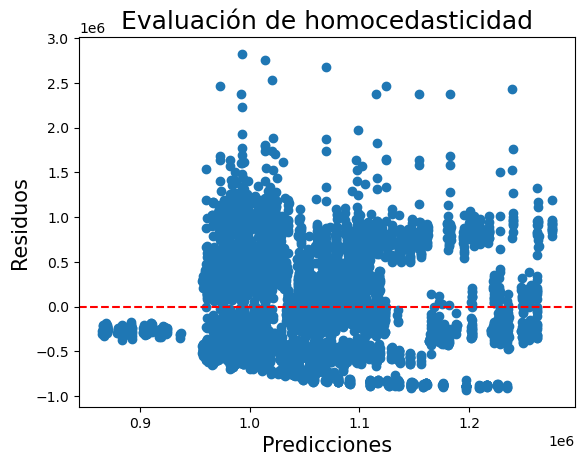

In [36]:
fig, ax = plt.subplots()
ax.scatter(predicciones_pooled_OLS_2, residuos_pooled_OLS_2)
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicciones', fontsize = 15)
ax.set_ylabel('Residuos', fontsize = 15)
ax.set_title('Evaluación de homocedasticidad', fontsize = 18)
plt.show()

Comprobemos esta intuición gráfcia con el test de Breusch-Pagan:

In [37]:
from statsmodels.stats.diagnostic import het_breuschpagan

In [38]:
pooled_OLS_df_2 = pd.concat([df, residuos_pooled_OLS_2], axis=1)
pooled_OLS_df_2 = pooled_OLS_df_2.drop(['fecha'], axis = 1).fillna(0)
X_ = sm.tools.tools.add_constant(dfc2).fillna(0)

In [39]:
pooled_OLS_df_2

,,ventas,feriado,temperatura,precio_combustible,ind_precio_consumidor,tasa_desempleo,residual
fecha,nro_tienda,,,,,,,
05-02-2010,1,1643690.90,0,42.31,2.572,211.096358,8.106,667952.364349
12-02-2010,1,1641957.44,1,38.51,2.548,211.242170,8.106,666451.367877
19-02-2010,1,1611968.17,0,39.93,2.514,211.289143,8.106,636536.985832
26-02-2010,1,1409727.59,0,46.63,2.561,211.319643,8.106,434345.031165
05-03-2010,1,1554806.68,0,46.50,2.625,211.350143,8.106,579472.746498
...,...,...,...,...,...,...,...,...
28-09-2012,45,713173.95,0,64.88,3.997,192.013558,8.684,-266767.279557
05-10-2012,45,733455.07,0,64.89,3.985,192.170412,8.667,-247007.283033
12-10-2012,45,734464.36,0,54.47,4.000,192.327265,8.667,-245747.925062


In [40]:
breusch_pagan = het_breuschpagan(pooled_OLS_df_2.residual, X_)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val'] 
print(dict(zip(labels, breusch_pagan)))

{'LM-Stat': 49.08591746927971, 'LM p-val': 2.193453600662536e-11, 'F-Stat': 24.734508476920325, 'F p-val': 2.006048584395185e-11}


Como el p-valor del estadístico de Breush-Pagan es < 0.05 (2.1934536006610824e-11), entonces se rechaza la hipótesis nula, y por lo tanto estamos en la presencia de heterocedasticidad en el término del error.

    Ho:Las varianzas del error son iguales, hay presencia de homocedasticidad
    Hi:Las varianzas del error no son iguales, hay presencia de heterocedasticidad

**No-autocorrelación**

In [41]:
from statsmodels.stats.stattools import durbin_watson

In [42]:
durbin_watson = durbin_watson(pooled_OLS_df_2.residual) 
print(durbin_watson)

0.1111661807007761


Según la  prueba de Durbin Watson se puede concluir que existe una correlación positiva de 0.08717 entre las variables seleccionadas.

- 0 - 2 significa una autocorrelación positiva (cuanto más cerca de cero, mayor es la correlación)

**10. Obtenga el modelo definitivo, prediga los valores y comente el grado de ajuste del modelo. Justifique con métricas su respuesta.**

Para identificar el modelo definitivo es necesario realizar los modelos:

**Modelo de Efectos Fijos "Fixed effects"**

In [43]:
from linearmodels import PanelOLS

In [44]:
modelo_fe = PanelOLS(y, X, entity_effects = True)
resultados_fe = modelo_fe.fit()

In [45]:
resultados_fe

Dep. Variable:,ventas,R-squared:,0.0182
Estimator:,PanelOLS,R-squared (Between):,-0.0096
No. Observations:,5954,R-squared (Within):,0.0182
Date:,"Sun, Mar 17 2024",R-squared (Overall):,0.0169
Time:,20:17:25,Log-likelihood,-8.718e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,53.737
Entities:,143,P-value,0.0000
Avg Obs:,41.636,Distribution:,"F(2,5809)"
Min Obs:,40.000,,
Max Obs:,42.000,F-statistic (robust):,53.737


**Modelo de Efectos Aleatoreos "RandomEffects"**

In [46]:
from linearmodels import RandomEffects

In [47]:
modelo_re = RandomEffects(y, X)
resultados_re = modelo_re.fit()

In [48]:
resultados_re

Dep. Variable:,ventas,R-squared:,0.0175
Estimator:,RandomEffects,R-squared (Between):,-0.0087
No. Observations:,5954,R-squared (Within):,0.0182
Date:,"Sun, Mar 17 2024",R-squared (Overall):,0.0169
Time:,20:17:25,Log-likelihood,-8.725e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,52.927
Entities:,143,P-value,0.0000
Avg Obs:,41.636,Distribution:,"F(2,5951)"
Min Obs:,40.000,,
Max Obs:,42.000,F-statistic (robust):,53.089


In [49]:
resultados_re

Dep. Variable:,ventas,R-squared:,0.0175
Estimator:,RandomEffects,R-squared (Between):,-0.0087
No. Observations:,5954,R-squared (Within):,0.0182
Date:,"Sun, Mar 17 2024",R-squared (Overall):,0.0169
Time:,20:17:25,Log-likelihood,-8.725e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,52.927
Entities:,143,P-value,0.0000
Avg Obs:,41.636,Distribution:,"F(2,5951)"
Min Obs:,40.000,,
Max Obs:,42.000,F-statistic (robust):,53.089


**Test de Haussman**

Como ambos modelos devuelven resultados similares,  para seleccionar el modelo, aplicaremos el test de Hausman.

Con las siguientes hipótesis:

- Ho: El modelo preferido es el de efectos aleatorios
- Hi: El modelo preferido es el de efectos fijos

In [50]:
import numpy.linalg as la
from scipy import stats
import numpy as np

In [51]:
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
 
    pval = stats.chi2.sf(chi2, df)
    return chi2, df, pval

In [52]:
hausman = hausman(resultados_fe, resultados_re) 

In [53]:
print('chi-Squared: ' + str(hausman[0]))
print('degrees of freedom: ' + str(hausman[1]))
print('p-Value:' + str(hausman[2]))

chi-Squared: 3.7709799546998424
degrees of freedom: 3
p-Value:0.28727974152674635


Considerando que p-valor > 0.05 se admite la hipótesis nula, es decir que el estimado mas efeciente es el de Efectos Aleatoreos,ademas con un p-valor >0.05 se asume con el 95% de confianza.

**11. Grafique a los valores predicho de modelo vs los valores reales.
¿Cómo se ven una vez graficados frente a los valores reales? Argumente su respuesta.**

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
#Datos Observados
X = df[df.columns.difference(['ventas'])]
y = df.ventas 
#Datos Predichos
y1 = pooled_OLS_df_2.ventas

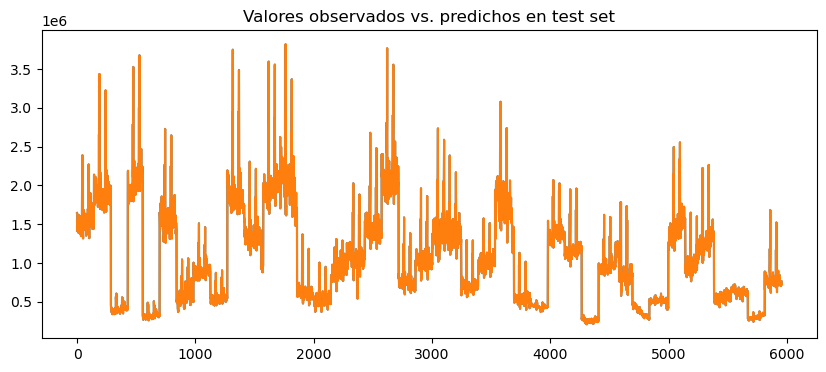

In [56]:
fig, ax = plt.subplots()
fig.set_size_inches(10,4)
ax.plot(y1.values)
ax.plot(y.values)
plt.title("Valores observados vs. predichos en test set");